In [28]:
#
# Import de toda la ejecucion
#
%matplotlib inline

from qiskit import *
from qiskit.providers.aer import noise
from qiskit import Aer, IBMQ, execute
from qiskit.providers.aer import noise
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [29]:
# Conexion al ordenador de melbourne
device = provider.get_backend('ibmq_5_yorktown')
properties = device.properties()
coupling_map = device.configuration().coupling_map
print(coupling_map)

[[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]


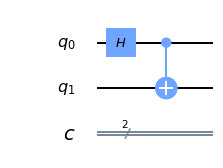

In [30]:
#
# Circuito a implememtar
#
secret_number = '101101'
secret_length = len(secret_number)
secret_range = range(secret_length)

bb = QuantumCircuit(2, 2)
bb.h(0)
bb.cx(0,1)

bb.draw(output='mpl')

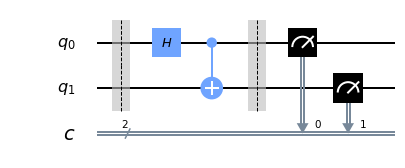

In [31]:
#
# Circuito de medicion (no tocar)
#
circuit = QuantumCircuit(2, 2)
circuit.barrier()
circuit +=bb
circuit.barrier()
circuit.measure([0, 1], [0,1])

circuit.draw(output='mpl')

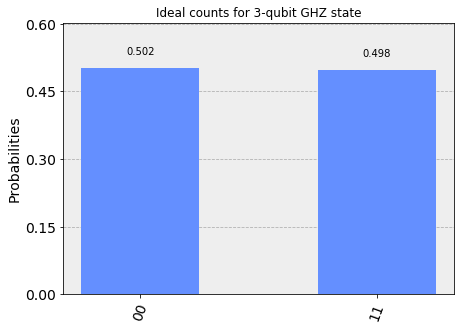

In [32]:
# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circuit, simulator).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='Ideal counts for 2-qubit entagled state')

In [34]:
# List of gate times for ibmq_14_melbourne device
# Note that the None parameter for u1, u2, u3 is because gate
# times are the same for all qubits
gate_times = [
    ('u1', None, 0)
    , ('u2', None, 100)
    , ('u3', None, 200)
    , ('cx', [0, 1], 500)
    , ('cx', [0, 2], 500)
    , ('cx', [1, 0], 500)
    , ('cx', [1, 2], 500)
    , ('cx', [2, 0], 500)
    , ('cx', [2, 1], 500)
    , ('cx', [2, 3], 500)
    , ('cx', [2, 4], 500)
    , ('cx', [3, 2], 500)
    , ('cx', [3, 4], 500)
    , ('cx', [4, 2], 500)
    , ('cx', [4, 3], 500)
    , ('cx', [], 800)
]

# Construct the noise model from backend properties
# and custom gate times
noise_model = noise.device.basic_device_noise_model(properties, gate_times=gate_times)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['measure', 'cx', 'id', 'u2', 'u3']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 1]), ('cx', [0, 2]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [2, 0]), ('cx', [2, 1]), ('cx', [2, 3]), ('cx', [2, 4]), ('cx', [3, 2]), ('cx', [3, 4]), ('cx', [4, 2]), ('cx', [4, 3]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


C:\Users\ilarburu\AppData\Local\Continuum\anaconda3\lib\site-packages\qiskit\providers\aer\noise\device\models.py:112: DeprecationWarning: gate_times kwarg is deprecated and will be removed in a future release. Use gate_lengths kwarg instead.
  DeprecationWarning)


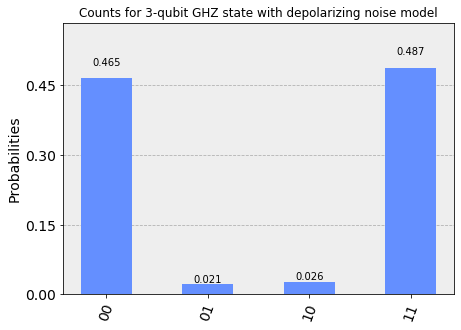

In [35]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator2 = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circuit, simulator2, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circuit)
plot_histogram(counts_noise, title="Counts for 2-qubit entangled state with depolarizing noise model")

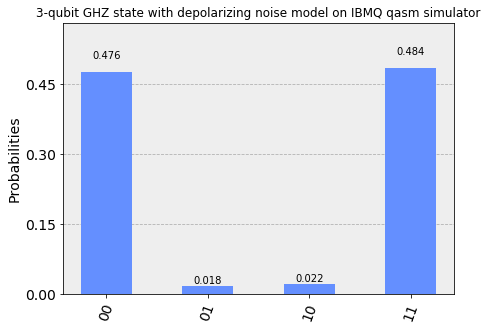

In [36]:
# Select the ibmq_qasm_simulator from the IBMQ provider
simulator3 = provider.get_backend('ibmq_qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circuit, simulator3, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circuit)
plot_histogram(counts_noise, title="2-qubit entagled state with depolarizing noise model on IBMQ qasm simulator")

Job Status: job has successfully run


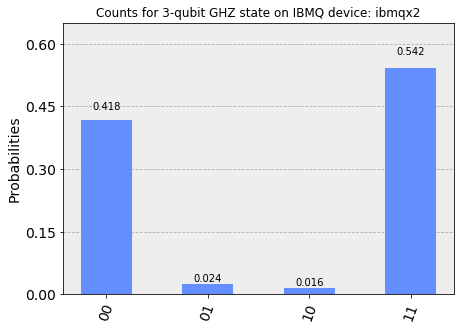

In [37]:
# Submit job to real device and wait for results
job_device = execute(circuit, device)
job_monitor(job_device)

# Get results from completed execution
result_device = job_device.result()
counts_device = result_device.get_counts(0)
plot_histogram(counts_device, title='Counts for 2-qubit entagled state on IBMQ device: {}'.format(device.name()))